In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
data = pd.read_csv("../preprocessed_data/Linux_process_GD-MM.csv")
data

,PID,TRUN,TSLPI,TSLPU,NICE,PRI,RTPR,CPUNR,EXC,CPU,...,Status_N,Status_NC,Status_NE,Status_NS,State_D,State_E,State_R,State_S,State_T,State_Z
0,0.043209,0.0,0.328571,0.0,0.0,0.863309,0.0,0.666667,0.0,0.0325,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.008354,0.0,0.014286,0.0,0.0,0.863309,0.0,0.000000,0.0,0.0225,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.042056,0.0,0.900000,0.0,0.0,0.863309,0.0,1.000000,0.0,0.0150,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.033933,0.0,0.114286,0.0,0.0,0.863309,0.0,0.000000,0.0,0.0150,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.034375,0.0,0.071429,0.0,0.0,0.863309,0.0,0.000000,0.0,0.0100,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.058917,0.0,0.014286,0.0,0.0,0.863309,0.0,1.000000,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
999996,0.021335,0.0,0.014286,0.0,0.0,0.863309,0.0,1.000000,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
999997,0.021393,0.0,0.014286,0.0,0.0,0.863309,0.0,0.000000,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
999998,0.021431,0.0,0.014286,0.0,0.0,0.863309,0.0,1.000000,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

In [2]:
X = data.drop(columns=['label']).values
y = data['label'].values

In [3]:
window_size = 30
X_windows = []
y_windows = []

for i in range(len(X) - window_size + 1):
    X_windows.append(X[i:i + window_size])
    y_windows.append(y[i + window_size - 1])  # ラベルはウィンドウの最後のデータに対応させます

X_windows = np.array(X_windows)
y_windows = np.array(y_windows)


# トレーニングデータとテストデータに分割
X_train, X_temp, y_train, y_temp = train_test_split(X_windows, y_windows, test_size=0.3, random_state=42, stratify=y_windows)
# テストデータをさらに検証データとテストデータに分割
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# LSTMモデルの構築
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# モデルの概要
model.summary()

2024-11-01 16:00:58.629131: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-01 16:00:58.656340: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-01 16:00:59.074078: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-01 16:00:59.368935: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/t

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        15,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,651 (61.14 KB)

 Trainable params: 15,651 (61.14 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# モデルの訓練
# モデルの訓練
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=1, shuffle=False)


Epoch 1/10


2024-11-01 16:01:03.234964: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900


10938/10938 ━━━━━━━━━━━━━━━━━━━━ 84s 8ms/step - accuracy: 0.8733 - loss: 0.2580 - val_accuracy: 0.8825 - val_loss: 0.2172
Epoch 2/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step - accuracy: 0.8834 - loss: 0.2183 - val_accuracy: 0.8851 - val_loss: 0.2148
Epoch 3/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 85s 8ms/step - accuracy: 0.8869 - loss: 0.2125 - val_accuracy: 0.8913 - val_loss: 0.2071
Epoch 4/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 85s 8ms/step - accuracy: 0.8924 - loss: 0.2050 - val_accuracy: 0.8943 - val_loss: 0.2005
Epoch 5/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 81s 7ms/step - accuracy: 0.8940 - loss: 0.2014 - val_accuracy: 0.8955 - val_loss: 0.2000
Epoch 6/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.8951 - loss: 0.1996 - val_accuracy: 0.8957 - val_loss: 0.1980
Epoch 7/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 69s 6ms/step - accuracy: 0.8956 - loss: 0.1982 - val_accuracy: 0.8947 - val_loss: 0.1992
Epoch 8/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 77s 7ms/step - accuracy: 0.8965 - lo

In [6]:
# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy:.4f}')

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8971 - loss: 0.1949
Test Accuracy: 0.8980


4688/4688 ━━━━━━━━━━━━━━━━━━━━ 3s 733us/step


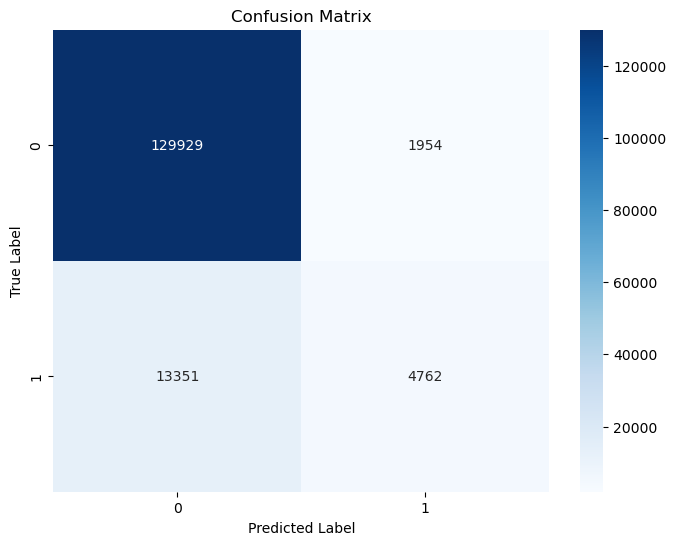

              precision    recall  f1-score   support

           0       0.91      0.99      0.94    131883
           1       0.71      0.26      0.38     18113

    accuracy                           0.90    149996
   macro avg       0.81      0.62      0.66    149996
weighted avg       0.88      0.90      0.88    149996



In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 予測の実行
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # 閾値0.5でクラスに変換

# 混同行列の計算
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# 混同行列の表示
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 精度、適合率、再現率、F1スコアのレポート
print(classification_report(y_test, y_pred_classes))


In [ ]:
import tensorflow as tf

# TensorFlowのバージョンを確認
print("TensorFlow version:", tf.__version__)

# 利用可能なGPUリストを表示
print("Available GPU devices:", tf.config.list_physical_devices('GPU'))
